# How Can Poland Increase its Sustainable Development?

This project analyzes Poland's progress toward the UN's Sustainable Development Goals (SDGs). These 17 goals are the standards that countries have agreed to reach by the year 2030. As a resident of Poland and an environmentalist, I am interested in figuring out what the SDGs suggest are areas where Poland can and needs to improve - and whether these agree with my existing knowledge and opinions.

The 17 SDGs are:

1. No Poverty
1. Zero Hunger
1. Good Health and Well-Being
1. Quality Education
1. Gender Equality
1. Clean Water and Sanitation
1. Affordable and Clean Energy
1. Decent Work and Economic Growth
1. Industry, Innovation and Infrastructure
1. Reduced Inequalities
1. Sustainable Cities and Communities
1. Responsible Consumption and Production
1. Climate Action
1. Life Below Water
1. Life on Land
1. Peace, Justice and Strong Institutions
1. Partnerships for the Goals

The data set used has been collected by the Sustainable Development Solutions Network and Institute for European Environmental Policy for their publication *The 2020 Europe Sustainable Development Report: Meeting the Sustainable Development Goals in the face of the COVID-19 pandemic* (SDSN and IEEP, Paris and Brussels, 2020). Here are the [full data](https://github.com/sdsna/ESDR2020) and [source website](https://sdgindex.org/reports/europe-sustainable-development-report-2020/).

The data cover 27 EU countries as well as 4 European Free Trade Association countries (Iceland, Liechtenstein, Norway, Switzerland), the UK and the combined EU. There are 17 Sustainable Development Goals, each comprising several sub-indicators that are measured numerically. The SDSN normalized and averaged these sub-indicator scores to create an overall score for every SDG for each country.

For this analysis, we created two csv files from the [SDSN Online Database Excel file](https://github.com/sdsna/ESDR2020/blob/main/ESDR2020%20Online%20Database.xlsx) : 

- 'SDG_Full_Database.csv': This contains the most current data on goals and sub-indicators for all countries
- 'SDG_Europe_data.csv': This contains data on historical trends in sub-indicators, where available

Both files are housed in the github directory for this project.

## Summary of Results

By analyzing the goals and sub-indicators, we arrive at the following priority areas for Poland in order to increase its performance relative to the EU average:

- Innovation & Industry: Increasing patents & building digital skills
- Gender Equality: Increasing the number of women in leadership
- Clean Energy: Increasing renewable energy & decreasing carbon emissions
- Sustainable Cities: Decreasing air pollution

In this report we present the data supporting these priorities and discuss their scope and limitations.

We begin by reading in and cleaning the first data set.

## Cleaning the Data

We read in the data, verify its format, check which countries are represented, and analyze null values.

In [1]:
import pandas as pd
sdg_current = pd.read_csv('SDG_Full_Database.csv', sep = ';', decimal = ',')

In [2]:
#Checking data/columns
print('Size:', sdg_current.shape)
sdg_current.head(2)

Size: (39, 503)


,Country,id,2020 EU SDG Index Score (0-100),2020 EU SDG Index Rank,Percentage Missing Values,Sub-region,Spillover Score,LNOB Score,2020 Population,Goal 1 Dashboard,...,Goal 8 Score,Goal 9 Score,Goal 10 Score,Goal 11 Score,Goal 12 Score,Goal 13 Score,Goal 14 Score,Goal 15 Score,Goal 16 Score,Goal 17 Score
0,Finland,FIN,81.10,1.0,1.75,Northern Europe,66.73,86.69,5540718.0,green,...,90.318,91.262,94.946,85.655,60.951,54.698,88.231,80.468,90.689,70.168
1,Sweden,SWE,81.02,2.0,2.63,Northern Europe,72.78,82.47,10099270.0,yellow,...,86.979,95.478,89.291,82.170,52.499,63.396,68.329,74.465,84.212,90.756


In [3]:
#List of countries/regions
sdg_current['Country']

0                        Finland
1                         Sweden
2                        Denmark
3                        Austria
4                         Norway
5                        Germany
6                       Slovenia
7                    Switzerland
8                         France
9                 Czech Republic
10                       Iceland
11                       Estonia
12                       Belgium
13                   Netherlands
14                United Kingdom
15                        Poland
16               Slovak Republic
17                       Ireland
18                       Hungary
19                        Latvia
20                         Spain
21                      Portugal
22                         Italy
23                       Croatia
24                     Lithuania
25                    Luxembourg
26                         Malta
27                        Greece
28                        Cyprus
29                       Romania
30        

Total null values: 2160


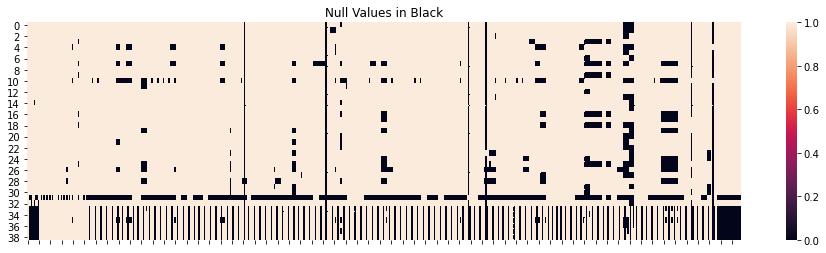

In [4]:
#Checking null values
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

print('Total null values:' , sdg_current.isnull().sum().sum())

fig = plt.figure(figsize =(16,4))
sns.heatmap(sdg_current.notnull()).set(xticklabels = [])
plt.title('Null Values in Black')
plt.show()

It seems most of the null values are in the last rows (the region rows), as well as country #31 (Liechtenstein). We will fill the region rows further below. For Liechtenstein, we verify that most entires are null, and then since it is a tiny country with little data we drop it from the analysis.

There are also a few columns at the end with many null values, which we see below are related to goals 14-16. Hence, we'll need to be aware of this when working with those goals.

Total null values in countries: 1248
Total null values in Liechtenstein: 369


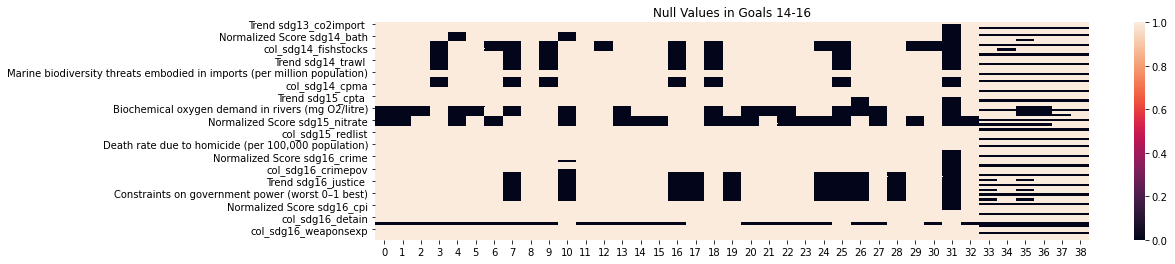

In [5]:
print('Total null values in countries:' , sdg_current[0:32].isnull().sum().sum())
print('Total null values in Liechtenstein:', sdg_current.iloc[31].isnull().sum().sum())

fig = plt.figure(figsize =(16,4))
sns.heatmap(sdg_current.iloc[:, 385:475].notnull().transpose())
plt.title('Null Values in Goals 14-16')
plt.show()

In [6]:
#dropping Liechtenstein
sdg_current.drop(31, inplace = True)

sdg_current.reset_index(inplace = True)

## Verifying Score Calculation
Next we'll verify that the normalized scores agree with the process described in the SDSN report. Namely, sub-indicators are normalized to a 0-100 scale and then averaged to create an overall 0-100 score for each SDG. The SDSN Excel file provides full documentation on how the minimum and maximum of each sub-indicator have been chosen.

We will verify for SDG 1: No Poverty, which has 3 sub-indicators shown below.

In [7]:
sdg_current.iloc[0:3, 44:55]

,People at risk of income poverty after social transfers (%),Normalized Score sdg1_transfer,col_sdg1_transfer,Trend sdg1_transfer,Severely materially deprived people (%),Normalized Score sdg1_material,col_sdg1_material,Trend sdg1_material,Poverty headcount ratio at $5.50/day (%),Normalized Score sdg1_550pov,col_sdg1_550pov
0,11.6,54.688,green,↑,2.4,92.357,green,↑,0.16,99.238,green
1,17.1,33.203,yellow,↓,1.8,94.268,green,↑,0.82,96.095,green
2,12.5,51.172,green,↑,2.6,91.720,green,↑,0.37,98.238,green


In [8]:
#columns to check
sdg1_indicators = ['People at risk of income poverty after social transfers (%)', 
                   'Severely materially deprived people (%)', 'Poverty headcount ratio at $5.50/day (%)']
sdg1_norm_cols = ['Normalized Score sdg1_transfer', 'Normalized Score sdg1_material', 'Normalized Score sdg1_550pov']

#min and max from SDSN documentation
sdg1_bounds = [[25.6,0], [31.4,0], [21,0]]

#copy of dataframe for checking normalized scores, with countries only
sdg_check_norm = sdg_current[0:32].copy()
print('Number of Unequal Scores:')
for i in range(3):
    #create column with new norm, using formula: (x - min(x))/ (max(x) - min(x))
    sdg_check_norm['norm{}'.format(i+1)] = round(
        (sdg_current[sdg1_indicators[i]] - sdg1_bounds[i][0]) / (sdg1_bounds[i][1] - sdg1_bounds[i][0]) * 100,3)
    #count unequal values:
    print('Sub-indicator {}:'.format(i+1), sum(sdg_check_norm['norm{}'.format(i+1)] 
                         != round(sdg_check_norm[sdg1_norm_cols[i]],3)))

Number of Unequal Scores:
Sub-indicator 1: 0
Sub-indicator 2: 0
Sub-indicator 3: 0


The normalized scores appear conistent with their documentation. Next we sum the normalized scores and check that this gives us the total Goal 1 score:

In [9]:
sdg_current.filter(regex = 'sdg1_', axis = 1).head(3)

,Normalized Score sdg1_transfer,col_sdg1_transfer,Trend sdg1_transfer,Normalized Score sdg1_material,col_sdg1_material,Trend sdg1_material,Normalized Score sdg1_550pov,col_sdg1_550pov,Trend sdg1_550pov
0,54.688,green,↑,92.357,green,↑,99.238,green,↑
1,33.203,yellow,↓,94.268,green,↑,96.095,green,↑
2,51.172,green,↑,91.720,green,↑,98.238,green,↑


In [10]:
#create column with mean of goal 1 sub-indicators
sdg_check_norm['goal_1_check'] = round(sdg_check_norm.filter(
    regex = 'Normalized Score sdg1_', axis = 1).mean(axis=1),3)

print('Number Unequal Goal 1 Scores:', 
      (sdg_check_norm['goal_1_check'] != round(sdg_check_norm['Goal 1 Score'],3)).sum())

Number Unequal Goal 1 Scores: 0


Again, the scores match. Lastly, we check that the mean of the 17 SDG scores matches the overall score:

In [11]:
#mean of 17 SDG goals for each country
sdg_totals = round(sdg_current.filter(regex = 'Goal [0-9]* Score').mean(axis=1),2)

#compare unequal entries
print('Number Unequal Totals:', 
      (sdg_totals[0:32] != round(sdg_current['2020 EU SDG Index Score (0-100)'],2)[0:32]).sum())

Number Unequal Totals: 0


## Calculating Regional Averages

The regions other than the EU lack total scores for each goal as well as an overall score, as noted above. We will fill each region with the mean score of its members, so that we can make comparisons across regions and compare countries to their regions.

In [12]:
#create DF of regions and Goal mean scores
region_goal_scores = round(sdg_current.groupby('Sub-region').mean().filter(
    regex = 'Country|Goal [0-9]* Score', axis = 1),3)

#resetting index manually to match DF
region_goal_scores.reset_index(inplace = True)
region_goal_scores.index = region_goal_scores.index + 32
region_goal_scores

#Fill null region values
sdg_current.fillna(region_goal_scores, inplace = True)

#Check it's worked
sdg_current.filter(regex = 'Country|Goal [0-9]* Score', axis = 1).tail(7)

#Note: this seems like an inelegant solution.
#How to fill a row in a DF with the column mean of only a SUBSET of the column that matches this row in another column?
#i.e. find mean of Region's 'Goal x Score' and fill Region's 'Goal x Score' with this?

,Country,Goal 1 Score,Goal 2 Score,Goal 3 Score,Goal 4 Score,Goal 5 Score,Goal 6 Score,Goal 7 Score,Goal 8 Score,Goal 9 Score,Goal 10 Score,Goal 11 Score,Goal 12 Score,Goal 13 Score,Goal 14 Score,Goal 15 Score,Goal 16 Score,Goal 17 Score
31,European Union,69.577,56.393,84.157,70.152,64.689,86.032,64.245,72.692,72.373,82.261,65.918,62.053,66.408,67.001,77.253,74.746,65.135
32,Baltic States,60.512,60.391,71.706,80.758,56.718,86.539,64.357,75.991,44.353,54.973,67.938,58.695,65.080,83.992,95.190,84.389,47.428
33,Central and Eastern Europe,65.848,59.061,77.021,61.553,53.621,82.345,61.883,71.020,43.856,78.728,58.544,63.664,71.583,74.660,85.429,74.585,52.093
34,EFTA Countries,81.346,50.014,91.922,78.310,80.288,78.820,96.537,86.750,87.648,92.106,74.413,47.235,36.833,69.458,61.014,85.069,64.942
35,Northern Europe,78.998,58.480,90.625,87.372,79.647,91.053,88.873,88.261,93.325,94.404,78.615,55.077,57.722,79.366,80.900,88.349,81.227
36,Southern Europe,64.466,50.671,84.163,66.055,55.440,78.299,56.976,67.178,51.267,79.411,56.201,54.765,67.450,61.301,67.550,74.902,60.635
37,Western Europe,76.263,52.240,87.248,74.132,68.494,86.713,61.747,78.774,84.322,88.731,72.888,51.005,52.478,73.931,75.293,78.654,54.426


We compute the new overall index score for each region and visualize these scores graphically.

In [13]:
#calculating overall score
sdg_current['2020 EU SDG Index Score (0-100)'].fillna(
    round(sdg_current.filter(regex = 'Goal [0-9]* Score', axis = 1).mean(axis = 1),2), inplace = True)

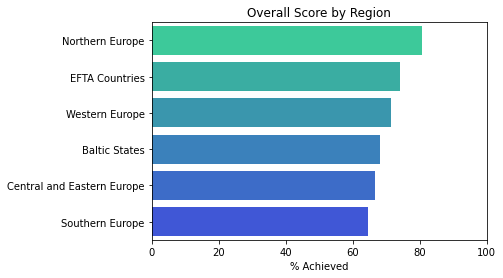

In [14]:
#renaming score column
sdg_current.rename({'2020 EU SDG Index Score (0-100)': 'overall_score'}, axis = 1, inplace = True)

region_totals = sdg_current.tail(6)[['Country', 'overall_score']].sort_values('overall_score')
ax = plt.subplot()
sns.barplot(y = 'Country', x = 'overall_score', data = region_totals, 
            palette = 'winter', ax = ax, alpha = 0.85).invert_yaxis()
plt.title('Overall Score by Region')
plt.ylabel('')
plt.xlim((0,100))
plt.xlabel('% Achieved')

plt.show()

We can see that there is variation in the region's scores, as visualized below. Within the EU, Northern and Western European countries have a higher average than Baltic, Central/Eastern and Southern European countries. As we'll next be focusing on Poland which is in the Central/Eastern Europe category, we will compare to both this region and the EU as a whole.

## EU Overall Progress on SDGs

We graph the 17 SDGs scores of the EU average and of Poland. As there are many goals, we color code from most complete (blue) to least complete (red).

In [15]:
#Creating DF with all countries' average scores for comparison
goals = sdg_current.filter(regex = 'Country|Goal [0-9]* Score', axis = 1).set_index('Country').transpose()

goals.reset_index(inplace = True)
goals.rename({'index' : 'goal'}, axis = 1, inplace = True)
goals['goal'] = goals['goal'].str.extract(r' ([0-9]*) ')

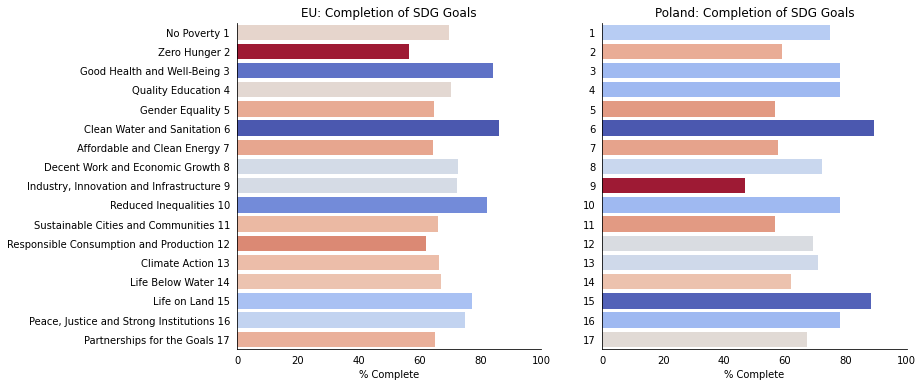

In [16]:
fig = plt.figure(figsize = (12,6))
ax1 = plt.subplot(1,2,1)

#calculate min & max for color-coding
eu_min = goals['European Union'].min()
eu_max = goals['European Union'].max()

import matplotlib as mpl
sns.barplot(y = 'goal', x = 'European Union', data = goals, ax = ax1, 
            #color-coding bars from blue to red based on rescaled values
            palette = mpl.cm.coolwarm(1 - (goals['European Union'] - eu_min ) / (eu_max - eu_min)))
plt.title('EU: Completion of SDG Goals')
plt.xlabel('% Complete')
plt.ylabel('')
plt.xlim((0,100))
ax1.set_yticklabels(['No Poverty 1','Zero Hunger 2','Good Health and Well-Being 3','Quality Education 4',
                     'Gender Equality 5', 'Clean Water and Sanitation 6','Affordable and Clean Energy 7',
                     'Decent Work and Economic Growth 8', 'Industry, Innovation and Infrastructure 9',
                     'Reduced Inequalities 10', 'Sustainable Cities and Communities 11',
                     'Responsible Consumption and Production 12','Climate Action 13',
                     'Life Below Water 14','Life on Land 15','Peace, Justice and Strong Institutions 16',
                     'Partnerships for the Goals 17'])

ax2 = plt.subplot(1,2,2)

pol_min = goals['Poland'].min()
pol_max = goals['Poland'].max()

sns.barplot(y = 'goal', x = 'Poland', data = goals, ax = ax2, 
            palette = mpl.cm.coolwarm(1 - (goals['Poland'] - pol_min ) / (pol_max - pol_min)))
plt.title('Poland: Completion of SDG Goals')
plt.xlabel('% Complete')
plt.ylabel('')
plt.xlim((0,100))

sns.despine()
ax1.tick_params(axis = 'both', left = False, bottom = False)
ax2.tick_params(axis = 'both', left = False, bottom = False)
plt.show()

Immediately we see that the EU has made the most progress on Goals 3, 6, and 10: Health, Sanitation and Inequality. Poland is also high in these categories, as well as Life on Land (Goal 15). This makes sense, as Europe generally has a high standard of basic safe living conditions for most of its population.

The bottom two goals for Europe are Zero Hunger (2) and Responsible Consumption/Production (12). Poland's lowest categories, meanwhile, are Industry, Innovation & Infratstructure (9) and Sustainable Cities (11). This suggests that while Poland may be doing well in similar categories to other European countries, its greatest challenges may be specific to it.

## Visualizing Comparative Progress

The graphs above highlight highest and lowest achievements, yet are less useful in comparing Poland and the EU more holistically. Below we create polar charts to more easily compare Poland with other countries/regions. We use the [plotly module](https://github.com/plotly/plotly.py/tree/6387cb3bbea7dcd891ca8a72ee630fca5d53e132) to create these charts.

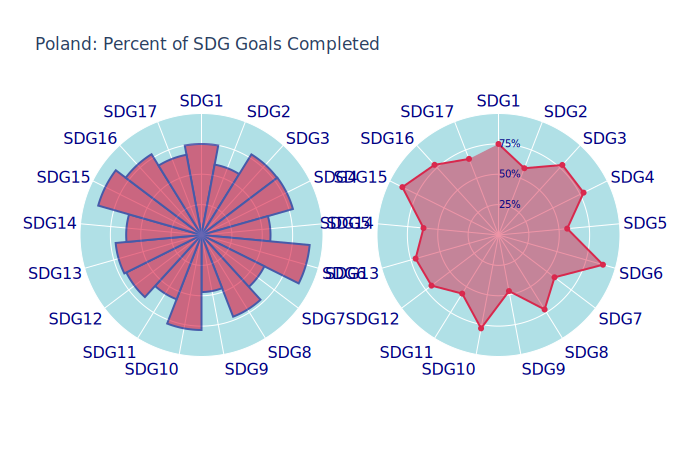

In [18]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.default = "svg"

fig = make_subplots(rows=1, cols=2, specs = [[{'type': 'polar'}, {'type' : 'polar'}]])

fig.add_trace(
    go.Barpolar(
        r=goals['Poland'],
        theta=goals['goal'],
        width=1,
        marker_color = 'crimson',
        opacity = 0.6,
        marker_line_color="navy",
        marker_line_width=2,
        showlegend = False),
    row=1, col=1
)

fig.add_trace(
    go.Scatterpolar(
        r=goals['Poland'], 
        theta = goals['goal'], 
        line_color = 'crimson', 
        opacity = 0.9, 
        fill = 'toself',
        showlegend = False),
    row = 1, col = 2
)
radialaxis_layout = dict(range=(0,100), 
                         color = 'navy', 
                         showline = False, 
                         angle = 90, 
                         tickvals = [25,50,75], 
                         tickangle = 90,
                         tickfont_size = 10, 
                         ticksuffix = '%')

angularaxis_layout = dict(rotation = 90, 
                          direction = 'clockwise', 
                          color = 'navy', 
                          tickprefix = 'SDG', 
                          tickfont_size = 16)

fig.update_polars(radialaxis = radialaxis_layout, 
                  angularaxis = angularaxis_layout,
                 bgcolor = 'powderblue')

fig.update_polars(radialaxis_showticklabels = False, col = 1)

fig.update_layout(height=500, width=1000, title_text="Poland: Percent of SDG Goals Completed")
fig.show()

These two graphs present the same information slightly differently. On the polar bar chart at left, each wedge represents the percentage of progress toward the optimal level in that goal. On the polar scatter chart at right, the points representing each goal's percentage are connected to form a polygon. The larger the overall area of this polygon, the more overall progress a country is making toward all goals.

As before, we can see that goals 6 and 15 are highest, and goal 9 is lowest. The left graph is slightly easier to read, yet the graph at right is easier to overlay with other countries, so we will use it in what follows. First we compare Poland's progress with that of the EU.

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatterpolar(r=goals['European Union'], theta = goals['goal'], 
                              name = 'EU', line_color = 'dodgerblue', opacity = 1 ))
fig.add_trace(go.Scatterpolar(r=goals['Poland'], theta = goals['goal'], 
                              name = 'Poland', line_color = 'crimson', opacity = .9))
fig.update_traces(fill='toself')

fig.update_polars(radialaxis = radialaxis_layout, 
                  angularaxis = angularaxis_layout,
                  bgcolor = 'gainsboro')

fig.show()

From the above we can see that Poland appears to be doing similarly to the EU average on many goals. This agrees with its overall middle-of-the-pack ranking of 16/31. 

Poland is below the EU average in:
- SDG 9: Industry, Innovation and Infrastructure - far below average
- SDG 3: Health and Wellbeing
- SDG 5: Gender Equality
- SDG 7: Affordable and Clean Energy
- SDG 11: Sustainable Cities & Communities
- SDG 14: Life Below Water

It's furthest above average in:
- SDG 4: Quality Education
- SDG 15: Life on Land

Most surprisingly to me, it is overperforming the average in 12&13 - Responsible Consumption/Production & Climate Action. This is surprising given Poland's heavy reliance on coal and reluctance to commit to EU decarbonization goals. 

Let's visualize how Poland compares to the highest and lowest ranked countries, to get a sense of the amount of variation within Europe.

In [ ]:
sdg_current.loc[(sdg_current['2020 EU SDG Index Rank'] == 1) | 
                (sdg_current['2020 EU SDG Index Rank'] == 31),'Country']

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatterpolar(r=goals['Finland'], theta = goals['goal'], 
                              name = 'Finland', line_color='mediumblue', opacity = .8))
fig.add_trace(go.Scatterpolar(r=goals['Poland'], theta = goals['goal'], 
                              name = 'Poland', line_color = 'crimson', opacity = .9))
fig.add_trace(go.Scatterpolar(r=goals['Bulgaria'], theta = goals['goal'], 
                              name = 'Bulgaria', line_color = 'mediumseagreen', opacity = .8 ))

fig.update_traces(fill='toself')

fig.update_polars(radialaxis = radialaxis_layout, 
                  angularaxis = angularaxis_layout,
                  bgcolor = 'gainsboro')

fig.show()

Finland has made almost full progress on goals 3-11, 14, and 16. This suggests that these goals might be easier to address than goals such as Goal 2 (No Hunger) and 13 (Climate Action) that are low across Europe. Policies enacted in successful countries could be studied and possibly adapted to Poland. 

By comparing Poland's relative position between Bulgaria and Finland, we can also see that it has the greatest room for growth in goals 5, 7, 9, 11, and 14.

Lastly, we'll compare Poland to the Central & Eastern Europe region average, to determine whether Poland matches this region more closely than the EU overall.

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatterpolar(r=goals['Poland'], theta = goals['goal'], 
                              name = 'Poland', line_color = 'crimson', opacity = 1))
fig.add_trace(go.Scatterpolar(r=goals['Central and Eastern Europe'], theta = goals['goal'], 
                              name = 'Central/East Europe', line_color = 'turquoise', opacity = .8 ))

fig.update_traces(fill='toself')

fig.update_polars(radialaxis = radialaxis_layout, 
                  angularaxis = angularaxis_layout,
                  bgcolor = 'gainsboro')

fig.show()

Poland's progress appears to be close to average within the Central & Eastern Europe region for most goals, through it does outperform on SDGs 1 (No Poverty), 4 (Education), and 17 (Partnerships), and underperforms on Goal 14 (Life on Water).

## Determining Priority SDGs for Poland

Based on the data above, we suggest the following goals might be good candidates for Poland to focus on because (1) they are below the EU average, so there is an opportunity for bigger change, and (2) Finland has much higher scores, so this change has been attainable in at least one European country.

- Goal 9 (Industry, Innovation, Infrastructure)
- Goal 14 (Life below Water)
- Goal 5 (Gender Equality)
- Goal 7 (Clean Energy)
- Goal 11 (Sustainability)

The last three are also low-scoring goals for the EU overall, on average.

## Correlation between Goals

Before we investigate each of these goals, we check whether there are any significant correlations between the SDG goals. It would make sense to work strategically on correlated goals as they're more likely to benefit each other.

In [ ]:
import numpy as np

#df: rows are countries, cols are goals
goals_transpose = goals.set_index('goal').transpose().reset_index()

goals_corr = round(goals_transpose.corr(),2)

#creates upper triangular matrix of 1s with same size as goal_corr
mask_ut=np.triu(np.ones(goals_corr.shape)).astype(np.bool)

#plot heatmap of correlations
fig = plt.figure(figsize = (20,10))
ax = plt.subplot(1,2,1)
sns.heatmap(goals_corr, annot = True, vmin = -1, vmax = 1, cmap = 'Spectral', ax = ax)

ax2 = plt.subplot(1,2,2)
sns.heatmap(goals_corr, annot = True, mask = mask_ut, vmin = -1, vmax = 1, cmap = 'Spectral', ax = ax2)

plt.show()

In the above we can see positive correlations represented as green/blue and negative as orange/red. From the left graph one can more easily see the correlations of individual goals (rows) and on the right we can more easily see the overall trend of correlation. The strongest correlations are between:
- Goals 1 and 10 - eliminating poverty and reducing inequality. This is intuitively reasonable. 
- Goals 3 and 9 - health and industry/innovation. This is more surprising, but could perhaps reflect better health care systems and medical technology in countries that score highly in both Goals.

Goals 3-11 appear to be the most strongly correlated with other goals (especially each other). This could be due to many European countries having higher scores in these goals. Interestingly, SDG 13 (Climate Action) is negatively correlated with most other goals including SDG 7 (Affordable and Clean Energy). Although it is outside the scope of this analysis, it is worth further investigation. SDGs 2, 12, 15, 17 also have more negative or weak correlations; all but SDG 15 were in the lower averages.

## Individual SDG Analysis

Let's investigate some of the SDGs we identified earlier as being potential priorities for Poland. We see that SDG 9 (Innovation) is most strongly correlated with goals 3, 11, 5, and 1 in that order. Since correlation is only valid for linear data, we use a scatter plot to verify it is linear.

In [ ]:
fig = plt.figure(figsize=(16,4))

goal_list = [3, 11, 5, 1]
ylabel_list = ['Goal 3: Good Health', 'Goal 11: Sustainable Cities', 'Goal 5: Gender Equality', 'Goal 1: No Poverty' ]

for i in range(4):
    num = goal_list[i]
    ax = fig.add_subplot(1,4,i+1)
    #plot goal i
    ax.scatter(goals_transpose['9'],
               goals_transpose['{}'.format(goal_list[i])],
               color = 'dodgerblue')
    #plot Poland as separate point
    ax.scatter(goals_transpose.loc[15, '9'], 
               goals_transpose.loc[15, '{}'.format(num)], 
               marker='o', s=50, color = 'red', label = 'Poland')
    ax.set_xlim(0,100)
    ax.set_ylim(0,100)
    ax.set_xlabel('Goal 9: Innovation')
    ax.set_ylabel(ylabel_list[i])

sns.despine()
fig.tight_layout()
plt.legend(loc = 'upper right')
plt.show()

The data does indeed appear linear and encompasses a wide range in each variable. In particular, in SDGs 5 (Gender Equality) and 11 (Sustainabile Cities) Poland is significantly lower than the top countries, so could make progress on these in tandem with SDG 9 (Innovation).

For the other possible priority goals, Goal 7 (Affordable and Clean Energy)'s highest correlation is with Goal 5 (Gender Equality), but r = 0.67, which is only moderate. Still, it seems that most of the chosen goals are interrelated. Goal 14 (Life Below Water) is the exception - its only correlation above 0.5 is with Goal 15 (Life on Land), at r = 0.55. It seems reasonable that biological preservation in water and on land would be connected, and we will investigate this further later. Next we'll focus on Goal 9, as it is the furthest from the EU average.

## Goal 9 : Innovation, Industry and Infrastructure

Each goal is composed of several sub-indicators. As stated in the documentation, the sub-indicators for Goal 9 are:

Label | Explanation
 :--- | :---
sdg9_eurd | Gross domestic expenditure on R&D (% of GDP) 
sdg9_rdperson | R&D personnel (% of active population)
sdg9_epo | Patent applications to the European Patent Office (per 1,000,000 population)
sdg9_bband | Households with broadband access (%)
sdg9_bbandgap | Gap in broadband access, urban vs rural areas (p.p.)
sdg9_digital | Individuals aged 55 to 74 years old who have basic or above basic digital skills (%)
sdg9_lpi | Logistics performance index: Quality of trade and transport-related infrastructure (worst 1–5 best) 
sdg9_qs | The Times Higher Education Universities Ranking: Average score of top 3 universities (worst 0–100 best)
sdg9_articles | Scientific and technical journal articles (per 1,000 population)

These absolute values have been normalized onto a 0-100 scale based on the SDSN's expert judgments; roughly, 100% represents the goal being completely met, 0% represents the lowest possible value or lowest among all countries.

Below we find Poland's score for each sub-indicator.

In [ ]:
#Creating df of Goal 9 scores for all countries
goal9 = sdg_current.filter(regex = 'Country|^Normalized Score sdg9', axis = 1)[0:30].copy()

#shorten column names
goal9.columns = [item[-1] for item in goal9.columns.str.split()]

goal9[goal9['Country'] == 'Poland']

We can see that Poland scored lowest in patents, digital skills, R&D spending and personnel. Below, we compare these scores to the overall distribution of Europe's scores, as well as to the SDSN report's "green" threshold, which indicates a sub-indicator is achieved or on track to be achieved by 2030.

In [ ]:
fig, ax = plt.subplots(figsize = (8,6))

#boxplot of all countries
goal9.boxplot(vert = False, ax = ax, color = '#1e90ff').invert_yaxis()
ylabels = ['R&D Spending', 'R&D Personnel', 'Patents', 'Broadband Access', 'Broadband Gap',
          'Digital Skills', 'Logistics', 'Higher Ed', 'Articles']
ax.set_yticklabels(ylabels)
ax.grid(False)
ax.yaxis.set_ticks_position("right")
ax.tick_params(axis = 'y', labelsize = 12)

#mark poland
poland_x = goal9[goal9['Country'] == 'Poland'].iloc[0,1:10].tolist()
from numpy import arange
y_coords = arange(1,10)
plt.scatter(x = poland_x, y = y_coords, marker = "d", color = 'crimson', label = 'Poland')

#mark threshold for "green"; values taken from documentation
green9 = np.array([1.5, 1, 80, 80, 10, 35, 3, 30, 0.7])
max9 = np.array([3.3, 2, 240, 96, 0, 65, 4.2, 50, 1.2])
min9 = np.array([0.4, 0.3, 3, 60, 26, 5, 1.8, 0, 0])

#calculate normalized green threshold
green9_norm = (green9 - min9)/(max9 - min9) * 100

plt.scatter(x = green9_norm, y = y_coords, marker = ">", color = 'seagreen', label = 'Green Threshold')
plt.xlabel('% Achieved')
plt.legend()
sns.despine(right = False, left = True)

plt.show()

Now we see that Poland is in the lowest 25% of European countries in terms of Digital Skills, Number of Articles, Higher Ed Rankings, and Patents. All nine sub-indicators are below the median. Despite this, Poland is still above the "green threshold" for several sub-indicators - including Articles - because much or all of Europe is. When considering both relative position and green threshold, it appears that Digital Skills, Patents, and R&D Spending could be areas of strategic focus.

## Trends in Sub-indicators

We can get additional context for progress in these sub-indicators by looking at trends over time. For this we'll use the second database containing trend data.

In [ ]:
sdg_trends = pd.read_csv('SDG_Europe_data.csv', sep = ';', decimal = ',')

In [ ]:
print(sdg_trends.shape)

sdg_trends.head()

## Exploring and Cleaning the Trends Data 

As seen above, each row represents a country in a particular year. Not all indicators have data for each of the years.
Columns include country, id, year, population, and region in addition to each SDG sub-indicator.

We confirm the date range of our data and the that the countries are as expected:

In [ ]:
sdg_trends['year'].unique()

In [ ]:
sdg_trends['country'].unique()

The data ranges from 2000-2020, as expected.

In addition to the 32 countries expected, there are aggregate rows for the EU, Baltic States, Central and Eastern Europe, EFTA Countries, Northern Europe, Southern Europe, and Western Europe. (move this to earlier)

We check null values to address any gaps in the data:

In [ ]:
print('Total null values:' , sdg_trends.isnull().sum().sum())

fig = plt.figure(figsize =(16,4))
sns.heatmap(sdg_trends.notnull()).set(xticklabels = [])
plt.show()

There are numerous sub-indicators with null values so we'll need to watch this as we select specific ones. There's also a gap in data around row 400 corresponding to Liechtenstein, so we'll drop Liechtenstein's rows from the set as well. The other horizontal groups of null values are frequently for years 2019-20.

In [ ]:
sdg_trends = sdg_trends[sdg_trends['country'] != 'Liechtenstein'].reset_index().copy()

## Goal 9 Subindicators

Let's examine the trend data for goal 9 sub-indicators for Poland to determine if there is any useful information.

In [ ]:
sdg9_sub_poland = sdg_trends.filter(regex = 'year|sdg9', axis = 1)[sdg_trends['country'] == 'Poland']

sdg9_sub_poland.notnull().sum().sort_values(ascending = False)

We'll graph all indicators with 10 or more data points.

In [ ]:
sdg9_sub_poland_list = sdg9_sub_poland.notnull().sum().sort_values(ascending = False)[1:7].index

ylabels = ['Articles', 'R&D Personnel', 'R&D Spending', 'Patents', 'Broadband', 'Broadband Gap']

green9_list = [0.7, 1, 1.5, 80, 80, 10]

fig = plt.figure(figsize = (12,8))
for i in range(6):
    ax = plt.subplot(3,2,i+1)
    sns.lineplot(x = 'year', 
                 y = sdg9_sub_poland_list[i], 
                 data = sdg9_sub_poland, 
                 ax = ax, color = 'crimson', label = 'Poland', legend=False)
    plt.xlim((2000,2019))
    plt.axhline(green9_list[i], color = 'seagreen', label = 'Green Threshold')
    ax.set_xticks([2000, 2010, 2020])
    ax.set_xlabel('')
    ax.set_yticks([])
    ax.set_ylabel(ylabels[i])

plt.legend(bbox_to_anchor = (1.5,3.5))
plt.show()

We identified Research Spending, Patents and Digital Skills as areas of potential improvement. The last we lack historical data for, but we can see in the above that Research Spending is consistently increasing and is likely to reach the green threshold if current patterns continue. Patents, on the other hand have been quite stagnant; policy or other intervention will be needed to increase them.

Below, we identify countries in Europe and in the Central/Eastern region with highest scores for patents & digital skills, as they could suggest policies that might be useful in Poland.

In [ ]:
print('Top 4 Patents:')
sdg_trends[sdg_trends['year']==2018][['country','sdg9_epo']].sort_values('sdg9_epo', ascending = False).head(4)

In [ ]:
print('Top Central/East Europe Patents:')
sdg_trends[(sdg_trends['year']==2018) & 
           (sdg_trends['Sub-region']=='Central and Eastern Europe')
          ][['country','sdg9_epo']].sort_values('sdg9_epo', ascending = False).head(3)

In [ ]:
print('Top 3 Digital Skills:')
sdg_trends[sdg_trends['year']==2019][['country','sdg9_digital']].sort_values('sdg9_digital', ascending = False).head(3)

In [ ]:
print('Top Central/East Europe Digital Skills:')
sdg_trends[(sdg_trends['year']==2019) & 
                     (sdg_trends['Sub-region']=='Central and Eastern Europe')
                    ][['country','sdg9_digital']].sort_values('sdg9_digital', ascending = False).head(6)


In Central & Eastern Europe, Czechia and Slovenia appear to be the best countries to model, while the Netherlands may be a useful exemplar for both.

We will now analyze Goals 14, 5, 7, and 11 in a similar though less detailed fashion, to identify any sub-indicators that could be effective targets for improvement.

## Goal 14: Life Below Water

In [ ]:
goal_list = [14, 5, 7, 11]

#create dictionary of subindicators for each of the four goals above
priority_goals = {}

for num in goal_list:
    regex = 'Country|^Normalized Score sdg{}'.format(num)
    df = sdg_current.filter(regex = regex, axis = 1)[0:30].copy()
    df.columns = [item[-1] for item in df.columns.str.split()]
    priority_goals[num] = df[df['Country'] == 'Poland']
    
priority_goals[14]

The lowest normalized scores, from the documentation, are sdg14_bath : Bathing sites of excellent quality (according to bacterial tests), and sdg14_fishstocks: Fish caught from overexploited or collapsed stocks (% of total catch)

We investigate the trends in these scores. Values below are the non-normalized values; bathing sites range from 25-100 with green threshold of 80+, while fishstocks ranges from 90.7 - 0 with a green threshold of 10 or below.

In [ ]:
sdg_trends[(sdg_trends['country']=='Poland') & 
           (sdg_trends['sdg14_bath'].notnull())
          ][['year','sdg14_bath', 'sdg14_fishstocks']]

It seems that Poland was above the red threshold every year except the last, which indicates either a sharp change or an issue with data collection. 

For fish stocks, the scores appears to be based on data from 2014 and prior, so may or may not reflect the current situation. Given the issues with quality and quantity of data in these scores, more research would need to be done to make meaningful analysis of this category.


## Goal 5: Gender Equality

In [ ]:
priority_goals[5]

The last entry is null because it was deleted from the raw data, but from their published data we can insert Poland's value:

In [ ]:
priority_goals[5].loc[15,'sdg5_wsafe'] = round((63 - 33)/(90-33)*100,3)

priority_goals[5]

The two lowest normalized scores are % of women in parliament and % of women in management. Let's examine whether these are on track, and how they compare to the average EU progress.

In [ ]:
sns.set_style('darkgrid')

fig, axes = plt.subplots(1,2, sharey=True, figsize = (12,4))

plt.suptitle('Women in Leadership Positions', size = 14)

sdg_trends[sdg_trends['country']=='Poland'].plot(x = 'year', 
                                                 y = ['sdg5_wparl', 'sdg5_wmanage'], 
                                                 label = ['Parliament','Management'],
                                                 ax = axes[0],
                                                 title = 'Poland',
                                                 legend = False)

sdg_trends[sdg_trends['country']=='European Union'].plot(x = 'year', 
                                                         y = ['sdg5_wparl', 'sdg5_wmanage'], 
                                                         label = ['Parliament','Management'],
                                                         ax = axes[1],
                                                         title = 'EU',
                                                         legend = False)
for axis in axes:
    axis.axhline(40, color = 'green', label = 'Green Threshold')
    axis.set(ylim = (0,50), 
             ylabel = 'Percentage', 
             xticks = [2004+4*i for i in range(0,5)], 
             xlabel = 'Year',             
            )
    axis.tick_params(labelsize = 12)

plt.legend(bbox_to_anchor = (1.05,1))

plt.show()

There is slight but slow progress, considerably less than the EU average. This is an area that will likely need active intervention to achieve at least 40% women.


## Goal 7: Affordable and Clean Energy

In [ ]:
priority_goals[7]

The lowest normalized score is certainly sdg7_eurenew, representing how much of Poland's energy comes from renewable sources. It is well-known that Poland is still heavily dependent on coal. This is reflected in the graphs below.

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (12,4))

sdg_trends[sdg_trends['country']=='Poland'].plot(x = 'year', 
                                                 y = 'sdg7_eurenew', 
                                                 ax = ax1,
                                                 label = 'Poland',
                                                 color = 'crimson'
                                                )
sdg_trends[sdg_trends['country']=='European Union'].plot(x = 'year', 
                                                         y = 'sdg7_eurenew', 
                                                         ax = ax1,
                                                         label = 'EU',
                                                         color = 'dodgerblue'
                                                        )
ax1.set(ylim=(0,50),
        ylabel = '%'
       )
ax1.set_title('Percentage of Energy from Renewables', fontsize = 14)
ax1.axhline(30, color = 'green')

sdg_trends[sdg_trends['country']=='Poland'].plot(x = 'year', 
                                                 y = 'sdg7_co2twh', 
                                                 ax = ax2,
                                                 label = 'Poland',
                                                 color = 'crimson'
                                                )
sdg_trends[sdg_trends['country']=='European Union'].plot(x = 'year', 
                                                         y = 'sdg7_co2twh', 
                                                         ax = ax2,
                                                         label = 'EU',
                                                         color = 'dodgerblue'
                                                        )
ax2.set(ylim =(0,6),
       ylabel = 'MtCO2 / TWh')
ax2.set_title('CO2 emissions per unit electricity output', fontsize = 14)
ax2.axhline(1, color = 'green')

for axis in (ax1,ax2):
    axis.set(xticks = [2000+4*i for i in range(0,6)],
             xlabel = ''
            )
    axis.tick_params(labelsize = 12)

plt.show()

We can see that Poland has made very little progress on either goal in the past fifteen years, and in fact appears to be worsening in 2016-17, both in absolute terms and relative to the EU.

## Goal 11: Sustainable Cities and Communities

In [ ]:
priority_goals[11]

Here the lowest categores are sdg11_eupm25: exposure to PM 2.5 and sdg11_crowding: overcrowding rate in lower-income communities. Below we analyze how these are trending.

In [ ]:

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (12,4))

sdg_trends[sdg_trends['country']=='Poland'].plot(x = 'year', 
                                                 y = 'sdg11_eupm25', 
                                                 ax = ax1,
                                                 label = 'Exposure to PM 2.5 Pollution'
                                                )
ax1.axhline(10, color = 'green')
ax1.set(ylim=(0,40))


sdg_trends[sdg_trends['country']=='Poland'].plot(x = 'year', 
                                                 y = 'sdg11_crowding', 
                                                 ax = ax2,
                                                 label = 'Overcrowding in Low-Income Areas'
                                                )
ax2.axhline(35, color = 'green')
ax2.set(ylim=(0,80))

for axis in (ax1,ax2):
    axis.set(xticks = [2004+4*i for i in range(0,5)],
             xlabel = ''
            )
    axis.tick_params(labelsize = 12)

plt.show()

We see that overcrowding appears to be declining sufficiently quickly to reach the green threshold, but particulate air pollution has only marginally decreased and, like clean energy trends, has reversed in recent years. This agrees with my own experience of poor air quality in Warsaw in recent years.

## Areas of Strength
Before making final conclusions, we look at the two Goals where Poland is most outperforming the EU: Goals 4 and 15. These may indicate strengths Poland can use to make changes.

## Goal 4: Education

In [ ]:
sns.set_style('white')
goal4 = sdg_current.filter(regex = 'Country|^Normalized Score sdg4',axis=1)[0:32]

fig = plt.figure(figsize = (12,6))
ax = plt.subplot()
goal4.boxplot(vert = False, ax = ax).invert_yaxis()

#Mark Poland
poland_4 = goal4.iloc[15,1:10].tolist()
plt.scatter(x = poland_4, y = arange(1,10), marker = "d", color = 'red', label = 'Poland')

y_labels = ['Early education', 'Dropout rate', 'PISA score', 'Science achievement', 'Science achievement equity', 
            'Resilience', 'Adults with college degree', 'Adult learning', 'Adult numeracy']

ax.set_yticklabels(y_labels)
ax.set_title('Normalized Scores, Goal 4: Education', size = 16)
ax.yaxis.set_ticks_position("right")

plt.xlabel('% Achieved')
plt.legend()
sns.set_style('whitegrid')
ax.grid(False)
ax.tick_params(labelsize = 12)

plt.show()

Poland is in the top 25% of European countries in these categories:
- Early leavers from education and training (% of population aged 18 to 24)
- PISA score (worst 0–600 best)
- Underachievers in science (% of population aged 15)
- Resilient students (%)

This indicates that there is a strong secondary education system, particularly in science. In contrast, Adult learning and literacy are the lowest categories.

## Goal 15: Life on Land

In [ ]:
goal15 = sdg_current.filter(regex = 'Country|^Normalized Score sdg15',axis=1)[0:32]

fig = plt.figure(figsize = (8,4))
ax = plt.subplot()
goal15.boxplot(vert = False, ax = ax).invert_yaxis()

#Mark Poland
poland_15 = goal15.iloc[15,1:7].tolist()
plt.scatter(x = poland_15, y = arange(1,7), marker = "d", color = 'red', label = 'Poland')

ax.set_yticklabels(['Protected Land', 'Protected Freshwater', 'Oxygen in Rivers', 'Nitrate in ground', 
            'Endangered Species', 'Threats to Biodiversity from imports'])
ax.set_title('Normalized Scores, Goal 15: Life On Land', size = 16)

ax.yaxis.set_ticks_position("right")

plt.xlabel('% Achieved')
plt.legend()
sns.set_style('whitegrid')
ax.grid(False)
ax.tick_params(labelsize = 12)

plt.show()

Poland is in or near the top 25% of countries protecting biodiversity by most measures. This is interesting, as there has been much news coverage of the current government rolling back protections - for example, increasing logging in Białowieża National Park. It would be worthwhile to research further to determine which measures are most contributing to effective protection and whether they are continuing at present.

## Conclusions

The Sustainable Development Goals provide a top-level summary of countries' progress in many different areas. In order to compare across countries, they must be broad and may be based on old or sparse data. In addition, the choice of model, namely averaging all sub-indicator scores with equal weights, affects the final outcomes. Hence, these conclusions are only a tentative starting point for considering Poland's particular situation and should not be considered as extremely precise measurements. Despite these limitations, some interesting trends can still be observed.

To improve in the categories in which Poland lags the EU average, the data suggest the following are key issues to address:
- Innovation & Industry: Increasing patents & building digital skills
- Gender Equality: Increasing the number of women in leadership
- Clean Energy: Increasing renewable energy & decreasing carbon emissions
- Sustainable Cities: Decreasing air pollution

Poland's existing strong secondary education system, especially in science, could be harnessed by policymakers to address these issues. For example: the government, nonprofits and/or relevant businesses could support programs in secondary & tertiary education that encourage students - particularly women - to pursue innovation in sustainable energy as scientists or entrepreneurs.

Existing effective policies for protecting biodiversity might also provide a blueprint for further environmental protection policies. Finally, policies from comparable countries such as Slovenia and Czechia who are outperforming in these areas could also be studied and adapted for Poland.

While this analysis represents only the tip of the iceberg and deeper analysis would doubtless uncover other issues and nuances, it does represent a snapshot of Poland's progress and challenges in sustainable development.